In [1]:
# Inclusion de librerias y módulos
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# Nos permite convertir str a list
from ast import literal_eval

# Separación
from sklearn.model_selection import train_test_split

# Gradiente Descendente
from sklearn.linear_model import SGDClassifier

# Vectorizador
from sklearn.feature_extraction.text import TfidfVectorizer

# Classification report
from sklearn.metrics import classification_report

# Árbol de Decisión
# from sklearn.tree import DecisionTreeClassifier, plot_tree

# Validación Cruzada de HP en grilla.
# from sklearn.model_selection import GridSearchCV

# Normalización
# from sklearn.preprocessing import StandardScaler

# Utiles
from utiles import basic_metrics
from utiles import plot_cm
from utiles import plot_roc_pr
from utiles import ablation

# Colores
BLUE   = '#5DADE2'
RED    = '#ff7043'
ORANGE = '#F5B041'
GREEN  = '#58D68D'
YELLOW = '#F4D03F'

# Plot axes y legends parambs
plt.rcParams["axes.labelweight"]   = "bold"
plt.rcParams["axes.titleweight"]   = "bold"
plt.rcParams["legend.shadow"]      = True
plt.rcParams["figure.titleweight"] = "bold"

data_dir = os.path.join('..', 'dataset', 'ablations')

In [2]:
tokeep_list = [0.2, 0.4 , 0.6, 0.8, 1.0]
paritipantes = ['sudents_tutors', 'sudents', 'tutors']

In [3]:
results = dict()
for part in paritipantes:

    results[part] = dict()
    for tk in tokeep_list:
        print(f'>> Tipo de participante {part} y ablation al {tk:05.2f}...')

        # Carga de los datasets
        fname = f'yup_messages_ablated_{tk:05.2f}_{part}.csv'
        fpath = os.path.join(data_dir, fname)
        df = pd.read_csv(fpath)

        # Separacion en features y target
        X = df.text.apply(lambda x: ' '.join(literal_eval(x)))
        y = df.student_rating
        
        # Division en conjunto de train y test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Vectorizacion: Entrenamiento y transformación de los conjuntos de train y test
        vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)

        # Clasificador Stochastic Gradient Descent: Entrenamiento y clasificación
        SGD = SGDClassifier(random_state=42)
        SGD.fit(X_train, y_train)
        y_train_SGD = SGD.predict(X_train)
        y_test_SGD = SGD.predict(X_test)

        # Reportes de clasificación
        cr_train = classification_report(y_train, y_train_SGD, output_dict=True)
        cr_test = classification_report(y_test, y_test_SGD, output_dict=True)

        # Log de resultados
        results[part][f'{tk:05.2f}'] = dict()
        results[part][f'{tk:05.2f}']['size_train'] = X_train.shape
        results[part][f'{tk:05.2f}']['size_test'] = X_test.shape
        results[part][f'{tk:05.2f}']['cr_train'] = cr_train
        results[part][f'{tk:05.2f}']['cr_test'] = cr_test

>> Tipo de participante sudents_tutors y ablation al 00.20...
>> Tipo de participante sudents_tutors y ablation al 00.40...
>> Tipo de participante sudents_tutors y ablation al 00.60...
>> Tipo de participante sudents_tutors y ablation al 00.80...
>> Tipo de participante sudents_tutors y ablation al 01.00...
>> Tipo de participante sudents y ablation al 00.20...
>> Tipo de participante sudents y ablation al 00.40...
>> Tipo de participante sudents y ablation al 00.60...
>> Tipo de participante sudents y ablation al 00.80...
>> Tipo de participante sudents y ablation al 01.00...
>> Tipo de participante tutors y ablation al 00.20...
>> Tipo de participante tutors y ablation al 00.40...
>> Tipo de participante tutors y ablation al 00.60...
>> Tipo de participante tutors y ablation al 00.80...
>> Tipo de participante tutors y ablation al 01.00...


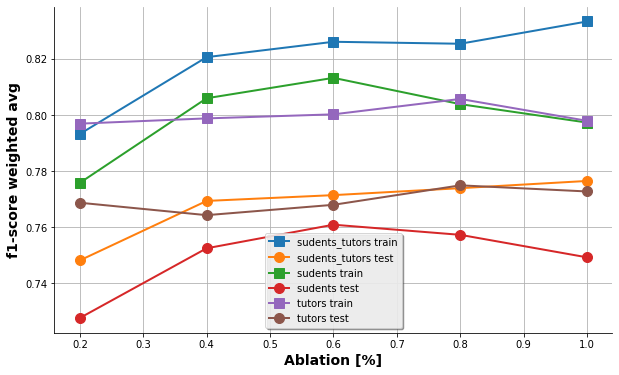

In [4]:
sizeh_train = list()
sizeh_test = list()
sizew_train = list()
sizew_test = list()
ps = list()
tks = list()

plt.figure(figsize=(10,6))
for part in paritipantes:
    f1_train = list()
    f1_test = list()
    for tk in tokeep_list:
        f1_train.append(results[part][f'{tk:05.2f}']['cr_train']['weighted avg']['f1-score'])
        f1_test.append(results[part][f'{tk:05.2f}']['cr_test']['weighted avg']['f1-score'])
        sizeh_train.append(results[part][f'{tk:05.2f}']['size_train'][0])
        sizeh_test.append(results[part][f'{tk:05.2f}']['size_test'][0])
        sizew_train.append(results[part][f'{tk:05.2f}']['size_train'][1])
        sizew_test.append(results[part][f'{tk:05.2f}']['size_test'][1])
        ps.append(part)
        tks.append(tk)

    plt.plot(tokeep_list, f1_train, 's-', linewidth=2.0, markersize=10, label=f'{part} train')
    plt.plot(tokeep_list, f1_test, 'o-', linewidth=2.0, markersize=10, label=f'{part} test')


plt.grid(True)
plt.legend()
plt.xlabel('Ablation [%]', fontsize=14)
plt.ylabel('f1-score weighted avg', fontsize=14)
sns.despine()



In [5]:
tmp = dict()
tmp['participat'] = ps
tmp['ablation'] = tks
tmp['rows_train'] = sizeh_train
tmp['cols_tran'] = sizew_train
tmp['rows_test'] = sizeh_test
tmp['cols_test'] = sizew_test

pd.DataFrame(tmp)

,participat,ablation,rows_train,cols_tran,rows_test,cols_test
0,sudents_tutors,0.2,13943,14587,3486,14587
1,sudents_tutors,0.4,13943,20791,3486,20791
2,sudents_tutors,0.6,13943,25495,3486,25495
3,sudents_tutors,0.8,13943,29476,3486,29476
4,sudents_tutors,1.0,13943,33151,3486,33151
5,sudents,0.2,13939,9258,3485,9258
6,sudents,0.4,13939,13706,3485,13706
7,sudents,0.6,13939,17156,3485,17156
8,sudents,0.8,13939,19979,3485,19979
9,sudents,1.0,13939,21704,3485,21704
